In [1]:
from scipy.io.arff import loadarff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Preprocessing

In [29]:
raw_data = loadarff("Training Dataset.arff")
df = pd.DataFrame(raw_data[0])
for c in df.columns:
    df[c] = df[c].apply(lambda x: int(x.decode('ascii'))) # remove weird binary values, leave as string for now
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [31]:
X = df.loc[:, df.columns != "Result"]
y = df.loc[:, "Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Principal Component Analysis (PCA) and Information Gain (IG)
- Filter and embedded methods

## Wrapper feature selection

1. Forward selection:
    Start with an empty subset of features. Add a single feature at a time, adding the feature that results in the greatest increase in the chosen metric.
2. Backward selection:
    Start with all features. Remove a single feature at a time, removing the one that results in the smallest decrease in the chosen metric (or even contributes to an increase).
3. Bi directional elimination:
    It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination. Hence, It is a combination of forward selection and backward elimination.

Greedy algorithms such as these must be used as even with a modest amount of features (30 in our case) the size of the set of all possible feature subsets is huge ($2^{30}\approx 10^9$) and grows exponentially and exhaustive search becomes computationally impossible.

QUESTION: how to pick the best k - number of features to keep. Impractical to try out all possible values of k.
QUESTION: how does Cross-validation come into play? In the paper they mentioned they used a 5-fold cross validation. My current thinking is crossvalidation is used in picking the best subset of features, while a separate test set is needed for final evaluation.

## Models that need to be implemented

1. Backpropagation Neural Network (BPNN)
2. Radial Basis Function Network (RBFN)
3. Naive Bayes (NB)
4. Support Vector Machine (SVM)
5. Decision Tree (C4.5) and Random FOrest (RF)
6. K-Nearest Neighbour (kNN)

## Used metrics

1. True Positive Rate (Sensitivity) -> $TPR = \frac{TP}{TP+FN}$
2. True Negative Rate (Specificity) -> $TNR = \frac{TN}{TN+FP}$
3. Geometric Mean -> $GM = \sqrt{TPR*TNR}$

We probably have to implement our own functions for each of these metrics.

Code below is a sample of the process using in-built functions. Also see http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/ and https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/.

In [ ]:
from sklearn.metrics import get_scorer_names
for i in get_scorer_names():
    print(i, end=' | ')

accuracy | adjusted_mutual_info_score | adjusted_rand_score | average_precision | balanced_accuracy | completeness_score | explained_variance | f1 | f1_macro | f1_micro | f1_samples | f1_weighted | fowlkes_mallows_score | homogeneity_score | jaccard | jaccard_macro | jaccard_micro | jaccard_samples | jaccard_weighted | matthews_corrcoef | max_error | mutual_info_score | neg_brier_score | neg_log_loss | neg_mean_absolute_error | neg_mean_absolute_percentage_error | neg_mean_gamma_deviance | neg_mean_poisson_deviance | neg_mean_squared_error | neg_mean_squared_log_error | neg_median_absolute_error | neg_root_mean_squared_error | normalized_mutual_info_score | precision | precision_macro | precision_micro | precision_samples | precision_weighted | r2 | rand_score | recall | recall_macro | recall_micro | recall_samples | recall_weighted | roc_auc | roc_auc_ovo | roc_auc_ovo_weighted | roc_auc_ovr | roc_auc_ovr_weighted | top_k_accuracy | v_measure_score | 

In [46]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

sfs = SFS(RandomForestClassifier(),
          k_features=(3, 25),
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

sfs.fit(X_train, y_train)
sfs.k_feature_names_

('having_IP_Address',
 'URL_Length',
 'Shortining_Service',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'on_mouseover',
 'RightClick',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report')

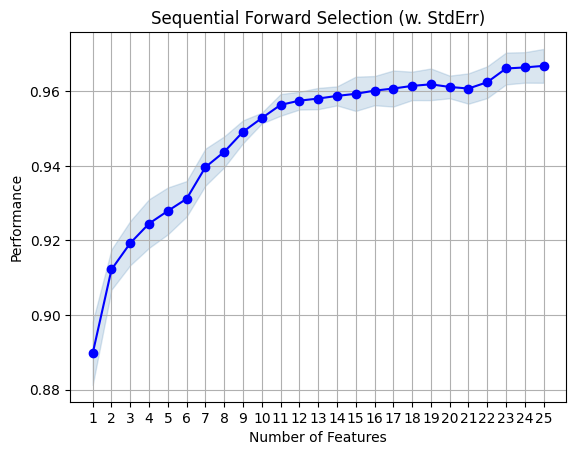

In [47]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

## Skeleton of custom implementations

In [14]:
import itertools
# AI written code
# Define a performance metric function
def accuracy(classifier, X, y):
    y_pred = classifier.predict(X)
    return sum(y == y_pred) / len(y)

# Define a search algorithm function
def brute_force_search(X):
    n_features = X.shape[1]
    for i in range(1, n_features+1):
        for subset in itertools.combinations(range(n_features), i):
            yield subset

def wrapper_feature_selection(classifier, X, y, performance_metric, search_algorithm):
    best_subset = []
    best_performance = -1
    for subset in search_algorithm(X):
        classifier.fit(X[:,subset], y)
        performance = performance_metric(classifier, X[:,subset], y)
        if performance > best_performance:
            best_performance = performance
            best_subset = subset
    return best_subset

best_subset = wrapper_feature_selection(classifier, X, y, accuracy, brute_force_search)